  Install Libraries

Import Libraries

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import os

Import Video

In [4]:
root = 'dst/fisheye/test'

In [5]:
files = os.listdir(root)

In [6]:
image_size = cv2.imread(f'{root}/{files[0]}', cv2.IMREAD_GRAYSCALE)
print(image_size.shape)

(960, 1280)


Get Random Frames

In [7]:
n_frames = 100
frames = []
frames_idx = []
for i in range(0, n_frames):
    index = random.randint(0, len(files))
    frames_idx.append(index)
    img = cv2.imread(f'{root}/{files[index]}',  cv2.IMREAD_GRAYSCALE)
    frames.append(img)

In [8]:
print(frames_idx)

[4895, 470, 4530, 4678, 4805, 637, 4645, 3877, 476, 1125, 3930, 4788, 5406, 4864, 3980, 2700, 756, 4589, 4723, 4076, 2857, 4849, 525, 4282, 2015, 4710, 3227, 5854, 2906, 102, 4248, 5195, 290, 5796, 1322, 2897, 3535, 686, 216, 3166, 4871, 2634, 2619, 2447, 2739, 819, 5535, 479, 5591, 503, 5148, 5310, 3516, 3464, 1096, 3436, 139, 1089, 4016, 1866, 2511, 621, 2332, 2071, 3711, 2790, 2725, 4335, 4009, 171, 2607, 2077, 2638, 189, 3602, 4041, 373, 1855, 4712, 2051, 5406, 4368, 4332, 815, 3664, 2265, 3441, 5710, 2831, 5755, 1325, 3169, 4194, 4221, 765, 1420, 962, 2079, 2694, 3976]


In [9]:
background = np.zeros_like(image_size) 
background.shape

(960, 1280)

Display randomly selected frames

In [10]:
# for i in frames:
#     plt.imshow(i)
#     plt.show()

In [ ]:
# %time
# # for colored background
# for x in range(0, image_size.shape[1]):
#     for y in range(0, image_size.shape[0]):
#         count = dict()
#         for frame in frames:
#             pixel = frame[y,x]
#             key = ' '.join([str(n) for n in pixel])
#             if key not in count.keys():
#                 count[key] = 1
#             else:
#                 count[key] += 1
#         max = 0
#         for j in count.keys():
#             if count[j] > max:
#                 max = count[j]
#                 entry = j
#         entry = entry.split(' ')
#         entry = [int(n) for n in entry]
#         background[y, x, :] = np.array(entry)

        

# print('done')

In [11]:
%time
# for grayscale
for x in range(0, image_size.shape[1]):
    for y in range(0, image_size.shape[0]):
        count = dict()
        for frame in frames:
            pixel = frame[y,x]
            key = pixel
            if key not in count.keys():
                count[key] = 1
            else:
                count[key] += 1
        max = 0
        for j in count.keys():
            if count[j] > max:
                max = count[j]
                entry = j
        background[y, x] = entry
print('done')

CPU times: total: 0 ns
Wall time: 0 ns
done


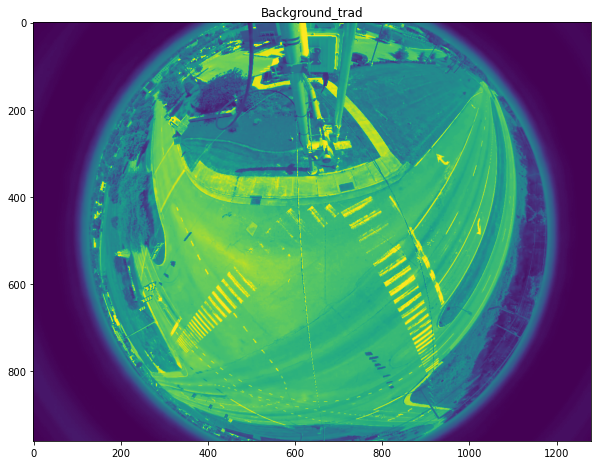

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(background)
plt.title("Background_trad")
plt.show()

In [13]:
cv2.imwrite(f'Background_test.jpg',background)

True